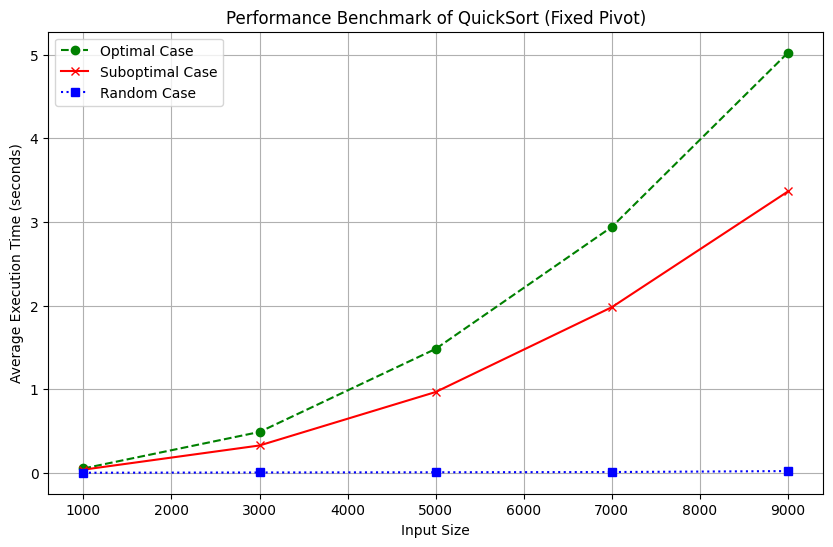

In [9]:
import random
from time import time
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(10000)
def quicksort_using_fixed_pivot(input_data, left_index, right_index):
    if left_index < right_index:
        pivot_index = partition_using_fixed_pivot(input_data, left_index, right_index)
        quicksort_using_fixed_pivot(input_data, left_index, pivot_index - 1)
        quicksort_using_fixed_pivot(input_data, pivot_index + 1, right_index)
def partition_using_fixed_pivot(input_data, left_index, right_index):
    pivot_value = input_data[right_index]
    partition_index = left_index - 1
    for current_index in range(left_index, right_index):
        if input_data[current_index] <= pivot_value:
            partition_index += 1
            input_data[partition_index], input_data[current_index] = input_data[current_index], input_data[partition_index]
    input_data[partition_index + 1], input_data[right_index] = input_data[right_index], input_data[partition_index + 1]
    return partition_index + 1
def evaluate_sorting_performance(sort_func, data_set, trial_count=5):
    total_elapsed_time = 0
    for _ in range(trial_count):
        data_copy = data_set[:]
        start_time = time()
        sort_func(data_copy, 0, len(data_copy) - 1)
        total_elapsed_time += (time() - start_time)
    return total_elapsed_time / trial_count
test_sizes = [i for i in range(1000, 10001, 2000)]
optimal_case_times = []
suboptimal_case_times = []
random_case_times = []
for size in test_sizes:
    optimal_array = list(range(size))
    suboptimal_array = optimal_array[::-1]
    random_array = [random.randint(0, size * 10) for _ in range(size)]
    random_case_times.append(evaluate_sorting_performance(quicksort_using_fixed_pivot, random_array))
    optimal_case_times.append(evaluate_sorting_performance(quicksort_using_fixed_pivot, optimal_array))
    suboptimal_case_times.append(evaluate_sorting_performance(quicksort_using_fixed_pivot, suboptimal_array))
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, optimal_case_times, label='Optimal Case', marker='o', linestyle='--', color='g')
plt.plot(test_sizes, suboptimal_case_times, label='Suboptimal Case', marker='x', linestyle='-', color='r')
plt.plot(test_sizes, random_case_times, label='Random Case', marker='s', linestyle=':', color='b')
plt.title('Performance Benchmark of QuickSort (Fixed Pivot)')
plt.xlabel('Input Size')
plt.ylabel('Average Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()
